In [1]:
import matplotlib.pyplot as plt
from scripts.datagen.create_dataset import create_dataset
from scripts.utils.params import *
from scripts.utils.utils import *
from scripts.particle.rungekutta import * 

## Generate Dataset for Fitzhug Nagumo model

In [2]:

# s_params = SolverParams(final_time=500, time_step=0.5, u0=[0.0, 0.0])
s_params = SolverParams.get_from_file('scripts/utils/parameters_files/parameters_FN.txt')
s_params.print_params()

fn_params = FNParams(
    solver_params=s_params, 
    k=8, 
    alpha=0.15, 
    epsilon=1e-2, 
    I=0.125, 
    gamma=0.1, 
    grid_size=(20, 20)
)

Solver =  thetamethod
T =  500.0
dt =  0.5
u0 =  [0, 0]
Theta:  0.5
Tolerance:  0.01


In [4]:
create_dataset(
    dataset_name="test1", 
    num_samples=1, 
    num_processes=1, 
    model_name='Fitzhug Nagumo',
    params=fn_params, 
    generate=True, 
    remove_samples=True)

Program finished in 48.36465000000317 seconds


(1, 1001, 20, 20, 2)


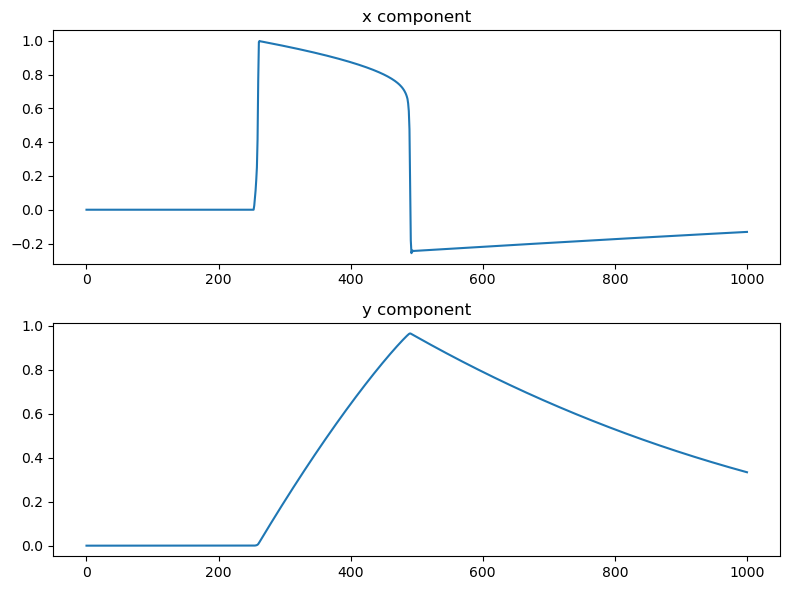

In [5]:
X = np.load("dataset/test1/test1_0.npz")['data']
print(np.shape(X))

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8, 6))

i=5
ax1.plot(np.arange(0,np.shape(X)[1],1), X[0, :, 5, 5, 0])
ax1.set_title('x component')

ax2.plot(np.arange(0,np.shape(X)[1],1), X[0, :, 5, 5, 1])
ax2.set_title('y component')

plt.tight_layout()
plt.show()

## Generate Dataset for Van Der Pol

In [2]:
from scripts.datagen.vanderpol import VanDerPol
import matplotlib.pyplot as plt
from scripts.utils.params import *
from scripts.utils.utils import *
from scripts.particle.thetamethod import ThetaMethod 

s_params = SolverParams.get_from_file('scripts/utils/parameters_files/parameters_VDP.txt')
s_params.print_params()

Solver =  thetamethod
T =  50.0
dt =  0.1
u0 =  [1.0, 1.0]
Theta:  0.5
Tolerance:  0.01


In [3]:
create_dataset(
    dataset_name="test2", 
    num_samples=1, 
    num_processes=1, 
    model_name='Van Der Pol',
    params=s_params,
    mu=1.0, 
    generate=True, 
    remove_samples=True)

Program finished in 8.09787789999973 seconds


In [5]:
VDP = VanDerPol(s_params,mu=1.0)
VDP.generate_dataset(num_samples=2,num_processes=2)

Program finished in 8.074555499944836 seconds


(501, 2)


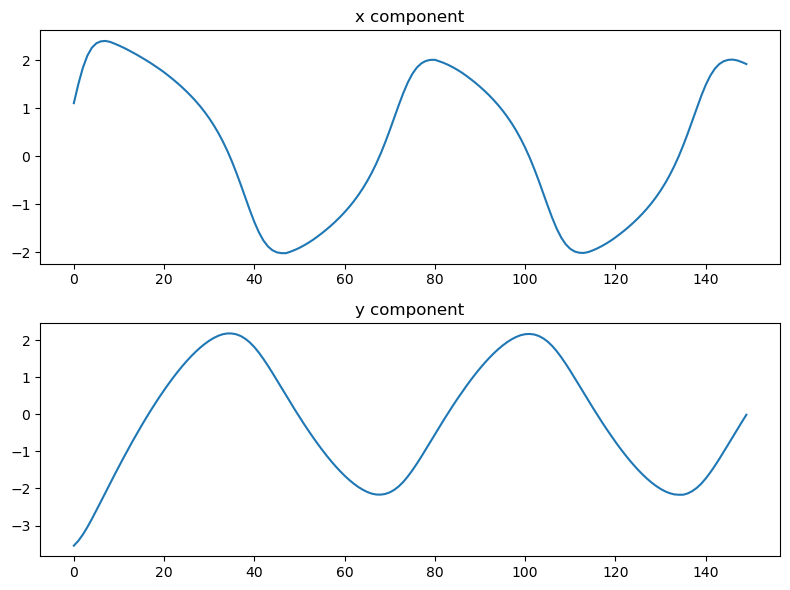

In [11]:
X = np.load("dataset/samples/sample_1.npy")
print(np.shape(X))

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8, 6))

i=150
ax1.plot(np.arange(0,i,1), X[:i,0])
# ax1.plot(np.arange(0,np.shape(X)[0],1), X[:,0])
ax1.set_title('x component')

ax2.plot(np.arange(0,i,1), X[:i,1])
# ax2.plot(np.arange(0,np.shape(X)[0],1), X[:50, 1])
ax2.set_title('y component')

plt.tight_layout()
plt.show()

(1001, 2)


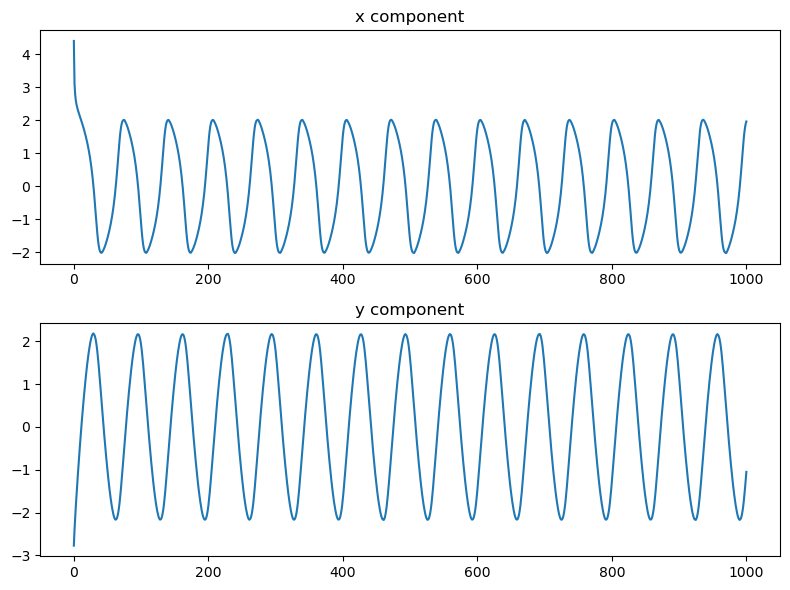

In [9]:
X = np.load("dataset/samples/sample_0.npy")
print(np.shape(X))

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8, 6))

ax1.plot(np.arange(0,np.shape(X)[0],1), X[:,0])
ax1.set_title('x component')

ax2.plot(np.arange(0,np.shape(X)[0],1), X[:, 1])
ax2.set_title('y component')

plt.tight_layout()
plt.show()